<a href="https://colab.research.google.com/github/huavanson/CS114.K21/blob/master/helmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/mydrive', True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /mydrive


In [2]:
import numpy as np 
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


Using TensorFlow backend.


In [3]:
import os
path = '/mydrive/My Drive/Machine learning project/'
filenames=os.listdir(path)

In [4]:
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='1':
        categories.append('1')
    else:
        categories.append('0')
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [5]:
df

,filename,category
0,0.18521344-2.jpg,0
1,0.18521344-1.jpg,0
2,1.18521344-4.jpg,1
3,1.18521344-3.jpg,1
4,1.18521344-5.jpg,1
...,...,...
362,0.18521391 (1).jpg,0
363,0.18521391 (14).jpg,0
364,0.18521391 (19).jpg,0
365,0.18521391 (15).jpg,0


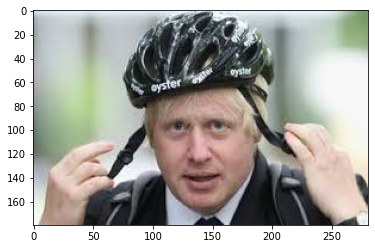

In [ ]:
sample = random.choice(filenames)
image = load_img(path+sample)
plt.imshow(image)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 16

In [6]:
train_df, validate_df = train_test_split(df, test_size=0.2)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [9]:
train_datagen = ImageDataGenerator(
    rotation_range=90,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path, 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 293 validated image filenames belonging to 2 classes.


In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    path, 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 74 validated image filenames belonging to 2 classes.


Found 1 validated image filenames belonging to 1 classes.


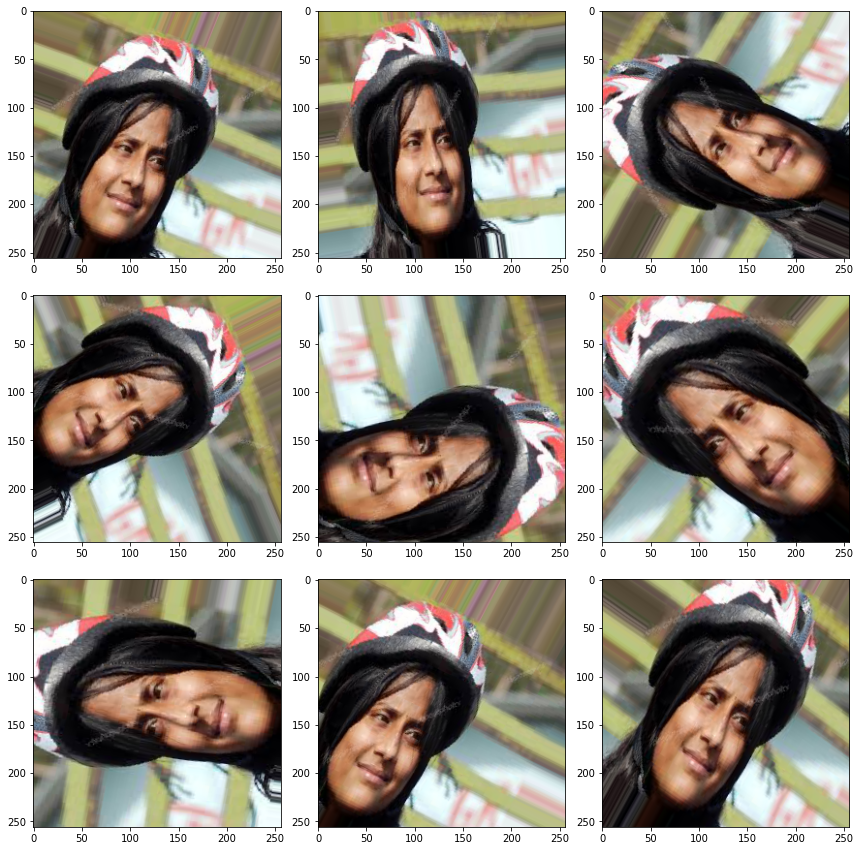

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    path, 
    x_col='filename',
    y_col='category',
  
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
# Defining the architecture of the sequential neural network.

final_cnn = Sequential()

# Input layer with 32 filters, followed by an AveragePooling2D layer.
final_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(200, 200, 1)))    # 3rd dim = 1 for grayscale images.
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# Three Conv2D layers with filters increasing by a factor of 2 for every successive Conv2D layer.
final_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

final_cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

final_cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

# A GlobalAveragePooling2D layer before going into Dense layers below.
# GlobalAveragePooling2D layer gives no. of outputs equal to no. of filters in last Conv2D layer above (256).
final_cnn.add(GlobalAveragePooling2D())

# One Dense layer with 132 nodes so as to taper down the no. of nodes from no. of outputs of GlobalAveragePooling2D layer above towards no. of nodes in output layer below (7).
final_cnn.add(Dense(132, activation='relu'))

# Output layer with  nodes (equal to the no. of classes).
final_cnn.add(Dense(1, activation='softmax'))

final_cnn.summary()

In [17]:
final_cnn.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [18]:
final_cnn_history = final_cnn.fit(train_generator,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/20
18/18 [==============================] - 96s 5s/step - loss: 0.6888 - accuracy: 0.5848 - val_loss: 0.6820 - val_accuracy: 0.5938
Epoch 2/20
18/18 [==============================] - 28s 2s/step - loss: 0.6877 - accuracy: 0.5740 - val_loss: 0.6831 - val_accuracy: 0.5690
Epoch 3/20
18/18 [==============================] - 20s 1s/step - loss: 0.6875 - accuracy: 0.5957 - val_loss: 0.6937 - val_accuracy: 0.5345
Epoch 4/20
18/18 [==============================] - 21s 1s/step - loss: 0.6882 - accuracy: 0.5776 - val_loss: 0.7045 - val_accuracy: 0.5172
Epoch 5/20
18/18 [==============================] - 20s 1s/step - loss: 0.6864 - accuracy: 0.5903 - val_loss: 0.6706 - val_accuracy: 0.6207
Epoch 6/20
18/18 [==============================] - 23s 1s/step - loss: 0.6868 - accuracy: 0.5714 - val_loss: 0.6789 - val_accuracy: 0.5938
Epoch 7/20
18/18 [==============================] - 23s 1s/step - loss: 0.6858 - accuracy: 0.5868 - val_loss: 0.6815 - val_accuracy: 0.6034
Epoch 8/20
18/18 [==

In [19]:
loss, accuracy = final_cnn.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.578125  ;  loss = 0.688124 


In [20]:
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False
for layer in pre_trained_model.layers[15:]:
    layer.trainable= True

  
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.1
x = Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [21]:
history = model.fit_generator(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/20
18/18 [==============================] - 25s 1s/step - loss: 0.9689 - accuracy: 0.5632 - val_loss: 0.7199 - val_accuracy: 0.5312
Epoch 2/20
18/18 [==============================] - 24s 1s/step - loss: 0.7597 - accuracy: 0.4910 - val_loss: 0.7203 - val_accuracy: 0.4828
Epoch 3/20
18/18 [==============================] - 20s 1s/step - loss: 0.6137 - accuracy: 0.6462 - val_loss: 0.6757 - val_accuracy: 0.5862
Epoch 4/20
18/18 [==============================] - 21s 1s/step - loss: 0.6073 - accuracy: 0.6931 - val_loss: 0.6366 - val_accuracy: 0.6207
Epoch 5/20
18/18 [==============================] - 21s 1s/step - loss: 0.5516 - accuracy: 0.7184 - val_loss: 0.4819 - val_accuracy: 0.7414
Epoch 6/20
18/18 [==============================] - 21s 1s/step - loss: 0.5260 - accuracy: 0.7365 - val_loss: 0.4546 - val_accuracy: 0.7500
Epoch 7/20
18/18 [==============================] - 24s 1s/step - loss: 0.5036 - accuracy: 0.7726 - val_loss: 0.3681 - val_accuracy: 0.8448
Epoch 8/20
18/18 [==

In [22]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.921875  ;  loss = 0.251847 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


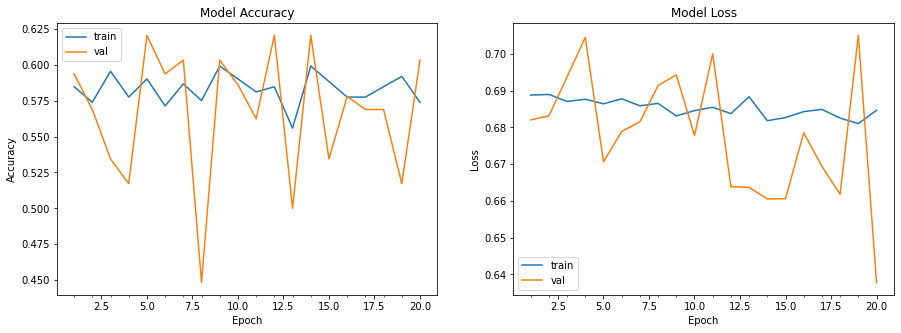

In [24]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(final_cnn_history)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


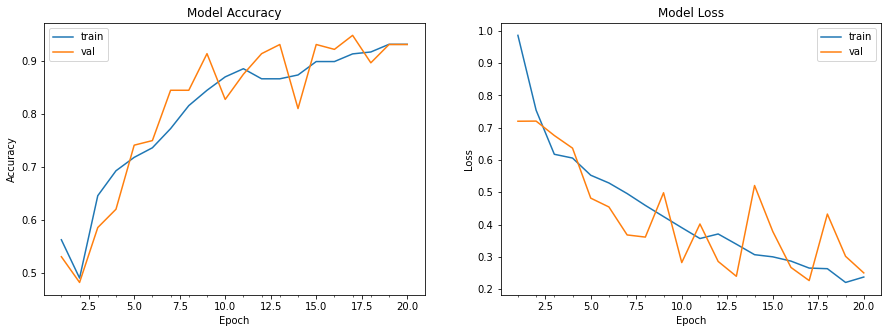

In [25]:
plot_model_history(history)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(validate_df['category'])
labels

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
#Y_val = validate_df['category']
y_pred =  model.predict_generator(validation_generator)

In [ ]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


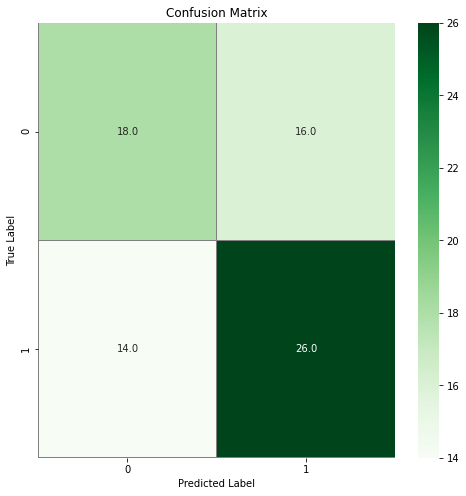

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix# compute the confusion matrix
confusion_mtx = confusion_matrix(labels, y_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
path2 = '/mydrive/My Drive/Input/'

In [ ]:
for image in os.listdir(path2):
    print('=== process image', image, ':', i, 'out of', len(os.listdir(path2)), sep=' ')
    faceimg = path2 + "/" + image
    img = cv2.imread(faceimg)
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = cascade.detectMultiScale(img)
    if len(faces) != 0:
        print("it is face")
        new_img = cv2.resize(img, (50,50))
        new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
        cv2_imshow(new_img)
    else:
        print('it is not face')
        os.remove(faceimg)
    i+=1

In [ ]:
test_filenames = os.listdir(path2)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    path2, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 1 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

In [ ]:
sample_test = test_df.sample(n=1).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(path2+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()